In [1]:
### Question 1: Import dataset and display first 5 rows
import pandas as pd

# Load dataset
df = pd.read_csv("tvmarketing.csv")

# Display first 5 rows
df.head()



,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [2]:
### Question 2: Check column data types
# Check data types
df.dtypes


TV       float64
Sales    float64
dtype: object

In [3]:
### Question 3: Check the shape of the DataFrame
# Print shape of DataFrame
df.shape

(200, 2)

In [4]:
### Question 4: Look at summary statistics
# Summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


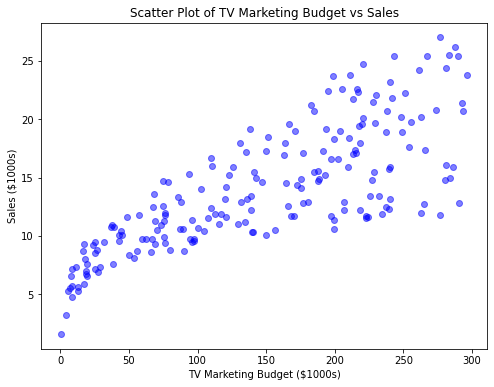

In [5]:
### Question 5: Visualize the relationship using scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df["TV"], df["Sales"], color='blue', alpha=0.5)
plt.xlabel("TV Marketing Budget ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Scatter Plot of TV Marketing Budget vs Sales")
plt.show()

In [17]:
### Question 6: Prepare X (feature variable) and y (response variable)
X = df[['TV']]
y = df['Sales']

In [7]:
### Question 7: Split Data into Training and Testing Sets (Without Sklearn)
import numpy as np

# Define train-test split ratio
train_ratio = 0.7
train_size = int(len(X) * train_ratio)

# Shuffle indices
indices = np.arange(len(X))
np.random.seed(42)
np.random.shuffle(indices)

# Split indices
train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Split data
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]


In [8]:
### Question 9: Perform Linear Regression Manually
import numpy as np

X_train_array = np.array(X_train).flatten()
y_train_array = np.array(y_train)

X_mean = np.mean(X_train_array)
y_mean = np.mean(y_train_array)

numerator = np.sum((X_train_array - X_mean) * (y_train_array - y_mean))
denominator = np.sum((X_train_array - X_mean) ** 2)
beta1 = numerator / denominator
beta0 = y_mean - (beta1 * X_mean)

beta0, beta1

(6.998636866114115, 0.04875635033987629)

In [18]:
### Question 10:Create the model using the calculated coefficients and make predictions on the testing set
y_pred_manual = beta0 + beta1 * np.array(X_test).flatten()
y_pred_manual[:5]

array([14.63388133, 20.48951901, 16.99368869, 10.2604367 , 10.72362203])

In [1]:
### Question 11: Perform Linear Regression using Sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [20]:
### Question 12: Print intercept and coefficients
intercept_sklearn = model.intercept_
slope_sklearn = model.coef_[0]
intercept_sklearn, slope_sklearn


(6.998636866114115, 0.04875635033987629)

In [21]:
### Question 13: Make Predictions using Sklearn
y_pred = model.predict(X_test)
y_pred[:5]


array([14.63388133, 20.48951901, 16.99368869, 10.2604367 , 10.72362203])

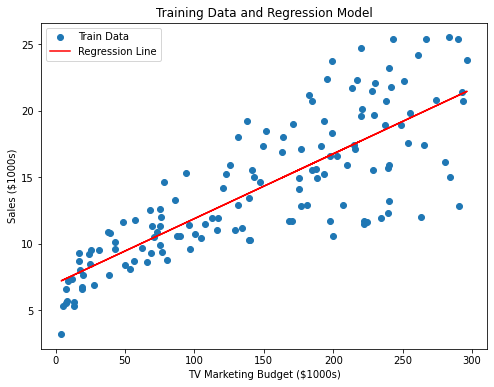

In [22]:
### Question 14: Plot Train Data and Model
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, label='Train Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel("TV Marketing Budget ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Training Data and Regression Model")
plt.legend()
plt.show()

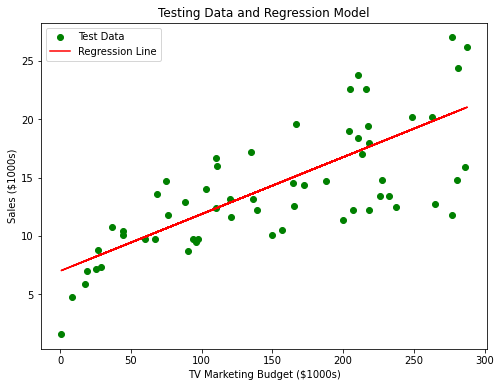

In [23]:

### Question 15: Plot Test Data and Model
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, label='Test Data', color='green')
plt.plot(X_test, model.predict(X_test), color='red', label='Regression Line')
plt.xlabel("TV Marketing Budget ($1000s)")
plt.ylabel("Sales ($1000s)")
plt.title("Testing Data and Regression Model")
plt.legend()
plt.show()

In [24]:
### Question 16: Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(12.892044730949669, 0.5184110184720037)

In [25]:
### Question 17: Calculate R Squared and Adjusted R Squared Manually
r_squared_manual = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
n = len(y_test)
k = 1
adj_r_squared_manual = 1 - ((1 - r_squared_manual) * (n - 1) / (n - k - 1))

r_squared_manual, adj_r_squared_manual

(0.5184110184720037, 0.5101077601697969)